In [2]:
# Step 1: Install necessary packages if not installed
# !pip install pandas matplotlib seaborn scikit-learn

In [3]:
# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import chi2_contingency

In [4]:
# Load the data from the CSV file
df = pd.read_csv("data_cleaned_2021.csv")

In [5]:
# Show basic information and statistics
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [6]:
# Replace -1 values with NaN for better handling of missing values
df['Rating'].replace(-1, np.nan, inplace=True)
df['Founded'].replace(-1, np.nan, inplace=True)

# Check for missing values
df.isnull().sum()

# Extract salary information if needed
df['Avg Salary(K)'] = (df['Lower Salary'] + df['Upper Salary']) / 2

C:\Users\nehil\AppData\Local\Temp\ipykernel_5880\113027799.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


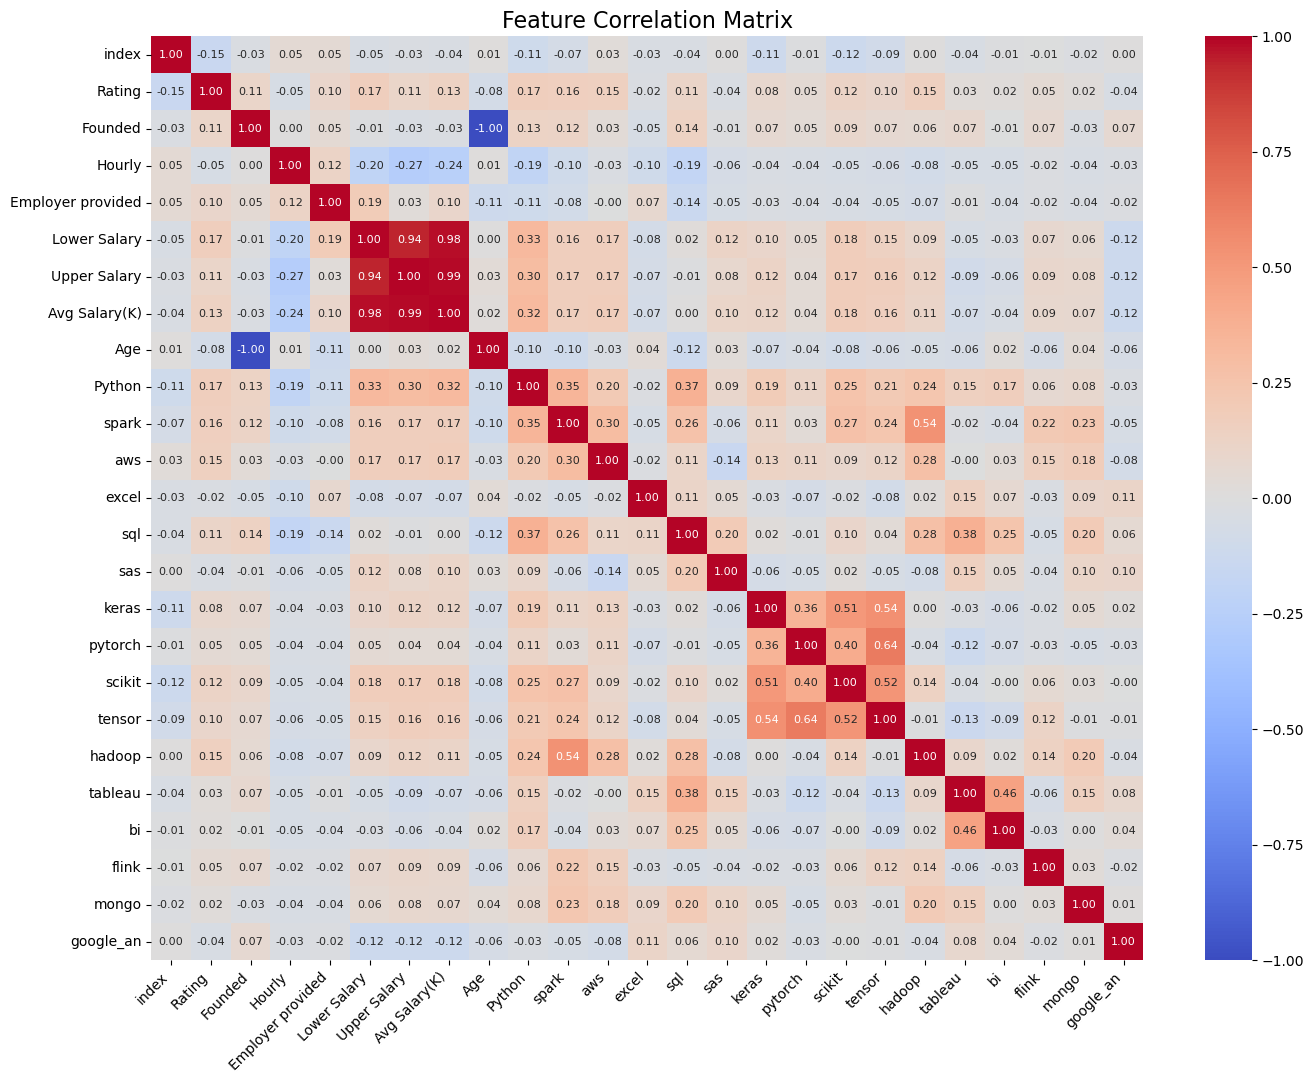

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Improved Correlation Heatmap
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0, fontsize=10)  # Rotate y-axis labels
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()

In [8]:
# Chi-Square test for independence between categorical features
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p  # p-value; low p-value (< 0.05) means features are not independent

# Example: Testing independence between 'Job Title' and 'Location'
p_value = chi_square_test(df, 'Job Title', 'Location')
if p_value < 0.05:
    print("Job Title and Location are not independent (p < 0.05)")
else:
    print("Job Title and Location are independent (p >= 0.05)")

Job Title and Location are not independent (p < 0.05)


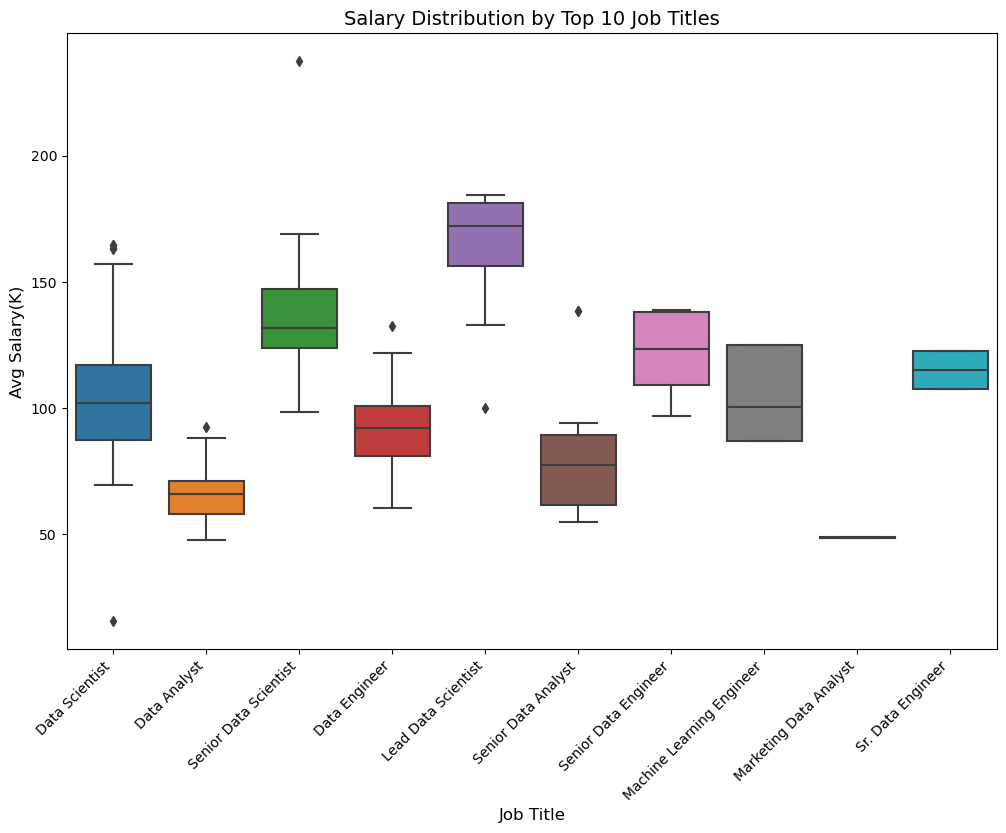

In [9]:
# Count the top 10 most frequent job titles
top_job_titles = df['Job Title'].value_counts().index[:10]
filtered_df = df[df['Job Title'].isin(top_job_titles)]

# Plot salary distribution for the top 10 job titles
plt.figure(figsize=(12, 8))  # Increase figure size
sns.boxplot(x='Job Title', y='Avg Salary(K)', data=filtered_df)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation for readability
plt.title("Salary Distribution by Top 10 Job Titles", fontsize=14)
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Avg Salary(K)", fontsize=12)
plt.show()

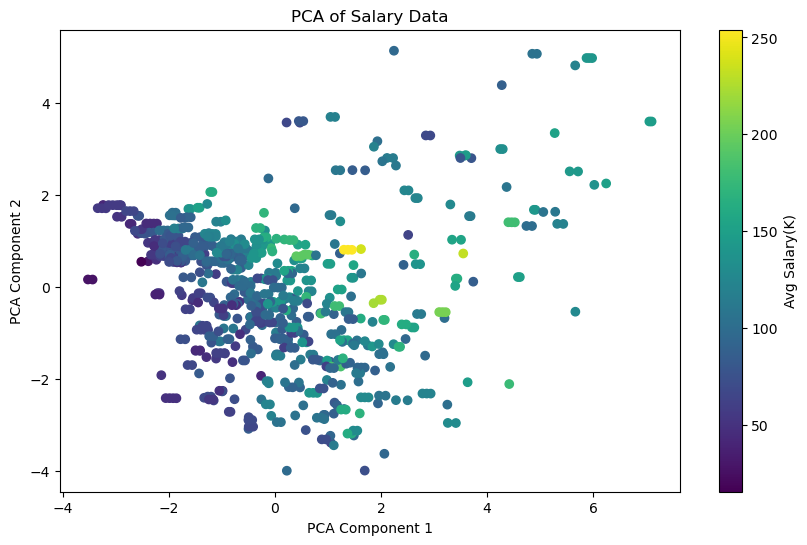

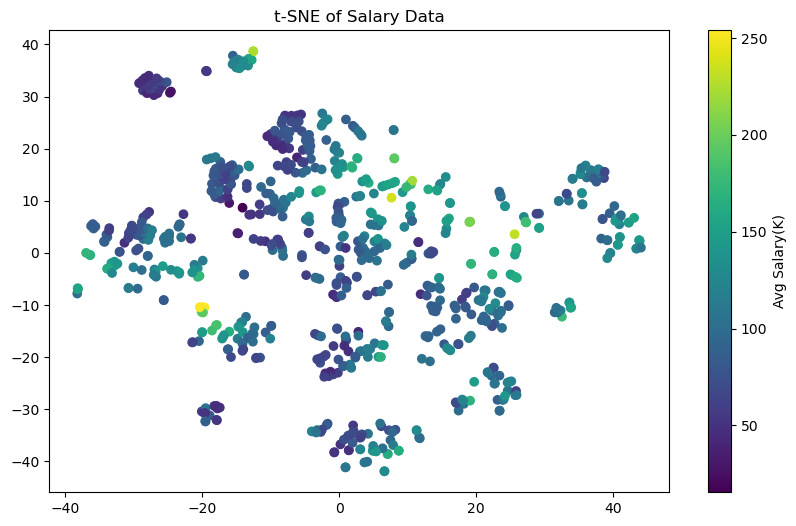

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features for PCA and t-SNE (excluding target column)
features = df.select_dtypes(include=[np.number]).drop(columns=['Avg Salary(K)'])
target = df['Avg Salary(K)']

# Fill missing values with the mean for each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap='viridis')
plt.title("PCA of Salary Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Avg Salary(K)")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=target, cmap='viridis')
plt.title("t-SNE of Salary Data")
plt.colorbar(label="Avg Salary(K)")
plt.show()

C:\Users\nehil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nehil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


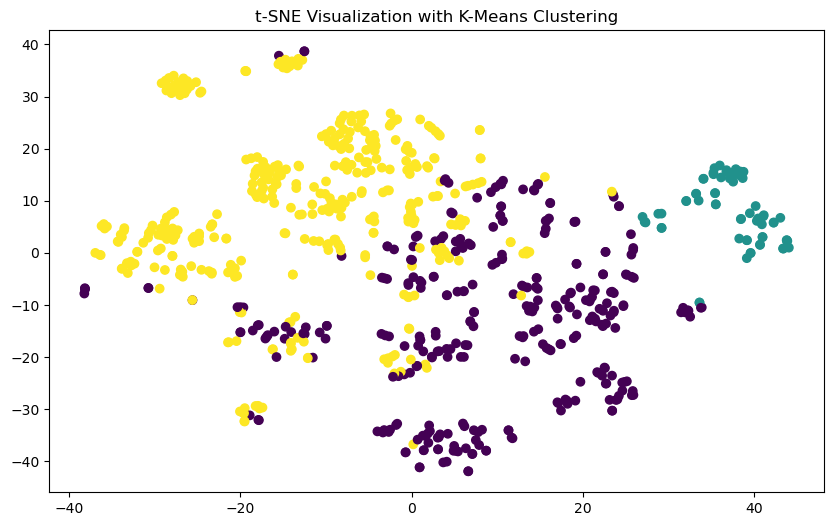

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

# Visualize t-SNE with K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("t-SNE Visualization with K-Means Clustering")
plt.show()

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

# Fill missing values in features with the mean for each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Select top features using SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
selected_features = selector.fit_transform(features_imputed, target)

# Retrieve the selected feature names
selected_columns = features.columns[selector.get_support()]
print("Selected Features:", selected_columns)

# Split data using the selected features for further model training
X_train_selected, X_test_selected, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

Selected Features: Index(['Rating', 'Hourly', 'Lower Salary', 'Upper Salary', 'Python', 'spark',
       'aws', 'scikit', 'tensor', 'google_an'],
      dtype='object')


In [13]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, selected_features, target, cv=kf, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))

MAE: 2.3796028533173825e-14
MSE: 1.1239308983057595e-27
R2 Score: 1.0
Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
Mean R2 Score: 1.0


In [14]:
# Experiment 1: Adding Interaction Terms
df['Experience_Location'] = df['Age'] * df['Location'].apply(hash)
df['Company_Sector'] = df['Size'].apply(hash) * df['Sector'].apply(hash)

In [15]:
# Experiment 2: Lasso and Ridge Regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_selected, y_train)
y_pred_lasso = lasso.predict(X_test_selected)
print("Lasso R2 Score:", r2_score(y_test, y_pred_lasso))

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_selected, y_train)
y_pred_ridge = ridge.predict(X_test_selected)
print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))

Lasso R2 Score: 0.9999999956498907
Ridge R2 Score: 0.9999999999999922


In [16]:
# Experiment 3: Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)
y_pred_gb = gb_model.predict(X_test_selected)
print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting R2 Score: 0.9994321062292897
